<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_(y_hat)_0_5_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n20.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n30.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.065836,48.337353,20.476308,-0.147576,154.731921,154.885170,-0.153249
1,0.0,1.0,61.521094,43.388231,99.238196,-0.937802,213.209720,214.431559,-1.221839
2,0.0,2.0,35.188924,40.093663,22.489124,0.388210,108.159921,107.877039,0.282881
3,0.0,3.0,92.053040,39.629540,66.779307,1.512553,209.974439,208.606883,1.367556
4,0.0,4.0,48.106614,49.987330,78.222268,1.007912,187.324124,186.539589,0.784535
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,51.774234,35.066106,94.975461,-0.874464,190.941337,191.389645,-0.448308
29996,999.0,26.0,49.187553,66.713404,54.654756,0.842351,181.398063,180.762157,0.635906
29997,999.0,27.0,48.862538,30.076438,45.028621,-0.192506,133.775091,133.770606,0.004485
29998,999.0,28.0,31.509652,23.732505,33.189127,-0.149172,98.282112,98.311817,-0.029705


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.065836  48.337353  20.476308  ...  154.731921  154.885170 -0.153249
      1.0    61.521094  43.388231  99.238196  ...  213.209720  214.431559 -1.221839
      2.0    35.188924  40.093663  22.489124  ...  108.159921  107.877039  0.282881
      3.0    92.053040  39.629540  66.779307  ...  209.974439  208.606883  1.367556
      4.0    48.106614  49.987330  78.222268  ...  187.324124  186.539589  0.784535
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   51.774234  35.066106  94.975461  ...  190.941337  191.389645 -0.448308
      26.0   49.187553  66.713404  54.654756  ...  181.398063  180.762157  0.635906
      27.0   48.862538  30.076438  45.028621  ...  133.775091  133.770606  0.004485
      28.0   31.509652  23.732505  33.189127  ...   98.282112   98.311817 -0.029705
      29.0   50.281814  61.247094  91.962089  ...  214.674143  213.416938  1.257205

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.065836  48.337353  20.476308  ...  154.731921  154.885170 -0.153249
      1.0    61.521094  43.388231  99.238196  ...  213.209720  214.431559 -1.221839
      2.0    35.188924  40.093663  22.489124  ...  108.159921  107.877039  0.282881
      3.0    92.053040  39.629540  66.779307  ...  209.974439  208.606883  1.367556
      4.0    48.106614  49.987330  78.222268  ...  187.324124  186.539589  0.784535
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   51.774234  35.066106  94.975461  ...  190.941337  191.389645 -0.448308
      26.0   49.187553  66.713404  54.654756  ...  181.398063  180.762157  0.635906
      27.0   48.862538  30.076438  45.028621  ...  133.775091  133.770606  0.004485
      28.0   31.509652  23.732505  33.189127  ...   98.282112   98.311817 -0.029705
      29.0   50.281814  61.247094  91.962089  ...  214.674143  213.416938  1.257205

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.065836,48.337353,20.476308,-0.147576,154.731921,154.885170,-0.153249
1,0.0,1.0,61.521094,43.388231,99.238196,-0.937802,213.209720,214.431559,-1.221839
2,0.0,2.0,35.188924,40.093663,22.489124,0.388210,108.159921,107.877039,0.282881
3,0.0,3.0,92.053040,39.629540,66.779307,1.512553,209.974439,208.606883,1.367556
4,0.0,4.0,48.106614,49.987330,78.222268,1.007912,187.324124,186.539589,0.784535
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,51.774234,35.066106,94.975461,-0.874464,190.941337,191.389645,-0.448308
29996,999.0,26.0,49.187553,66.713404,54.654756,0.842351,181.398063,180.762157,0.635906
29997,999.0,27.0,48.862538,30.076438,45.028621,-0.192506,133.775091,133.770606,0.004485
29998,999.0,28.0,31.509652,23.732505,33.189127,-0.149172,98.282112,98.311817,-0.029705


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.065836  48.337353  20.476308  ...  154.731921  154.885170 -0.153249
      1.0    61.521094  43.388231  99.238196  ...  213.209720  214.431559 -1.221839
      2.0    35.188924  40.093663  22.489124  ...  108.159921  107.877039  0.282881
      3.0    92.053040  39.629540  66.779307  ...  209.974439  208.606883  1.367556
      4.0    48.106614  49.987330  78.222268  ...  187.324124  186.539589  0.784535
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   51.774234  35.066106  94.975461  ...  190.941337  191.389645 -0.448308
      26.0   49.187553  66.713404  54.654756  ...  181.398063  180.762157  0.635906
      27.0   48.862538  30.076438  45.028621  ...  133.775091  133.770606  0.004485
      28.0   31.509652  23.732505  33.189127  ...   98.282112   98.311817 -0.029705
      29.0   50.281814  61.247094  91.962089  ...  214.674143  213.416938  1.257205

[30000 rows x 7 columns]

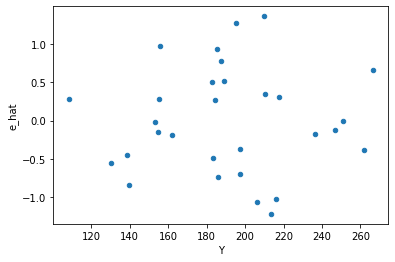

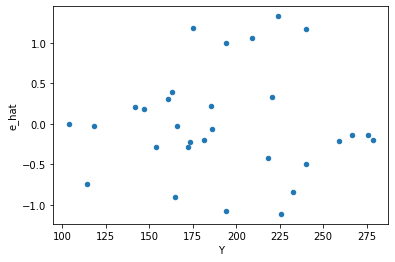

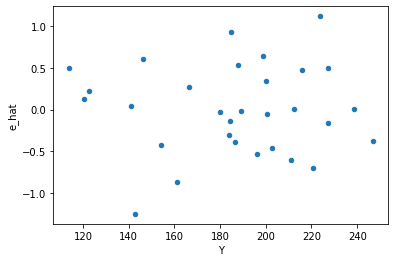

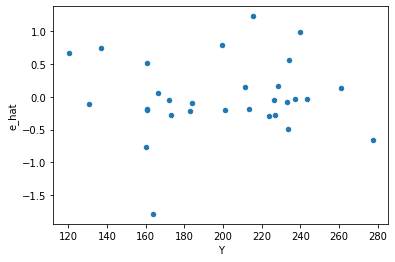

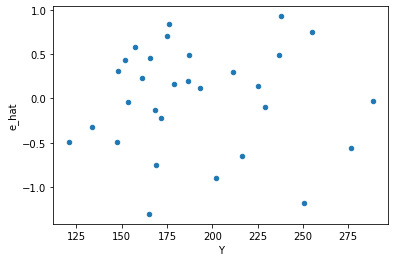

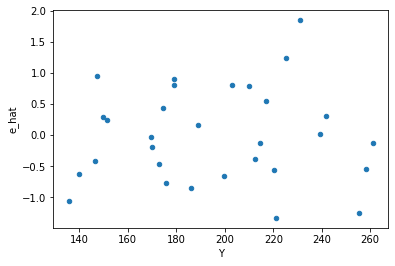

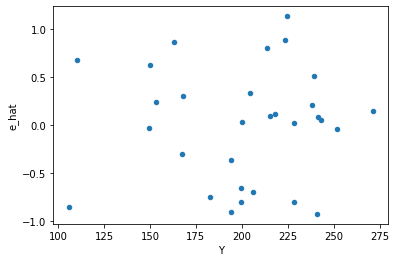

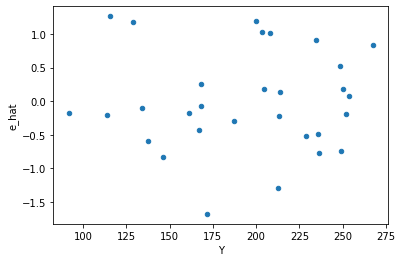

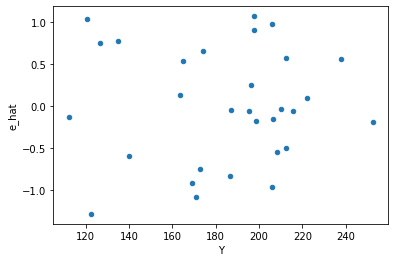

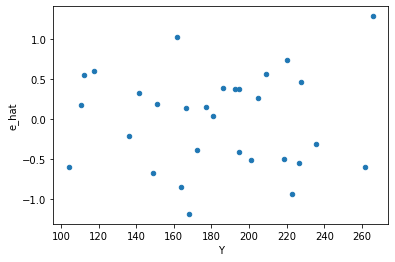

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew1.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew2.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew3.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew4.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew5.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew6.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew7.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew8.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew9.plot(x ='Y', y='e_hat', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,13.0,11.0,3.5820088448317837,6.621972691094983,0.27553914191013723,0.6019975173722713,2.1847985487615524,0.2021043303503509,0.8989478348248245,0.10105216517517546,Reject001=1 : Homoscedasticity
1.0,15.0,9.0,5.38586433459341,5.485426695376536,0.3590576223062273,0.6094918550418373,1.6974764416002948,0.4262641801790281,0.7868679099104859,0.21313209008951406,Reject001=1 : Homoscedasticity
2.0,6.0,18.0,1.549263242761041,4.446932441323553,0.2582105404601735,0.24705180229575296,0.9567843429453583,0.9616748972552938,0.5191625513723531,0.4808374486276469,Reject001=1 : Homoscedasticity
3.0,14.0,10.0,3.6366901717367055,3.906400900859412,0.259763583695479,0.3906400900859412,1.5038293071283189,0.5223720504125406,0.7388139747937297,0.2611860252062703,Reject001=1 : Homoscedasticity
5.0,12.0,12.0,4.317501343569735,8.267265932627769,0.3597917786308113,0.6889388277189807,1.9148264875332603,0.2745021336012261,0.862748933199387,0.13725106680061305,Reject001=1 : Homoscedasticity
6.0,6.0,18.0,1.6510290975504556,6.442751104984535,0.27517151625840924,0.3579306169435853,1.3007546050204495,0.612980420706188,0.693509789646906,0.306490210353094,Reject001=1 : Homoscedasticity
11.0,14.0,10.0,1.3688087064167695,9.729598888610896,0.09777205045834068,0.9729598888610896,9.951309032591624,0.0008833348118892914,0.9995583325940554,0.0004416674059446457,Reject001=0 : Heteroscedasticity
12.0,11.0,13.0,4.285282637718144,5.929354225904742,0.3895711488834676,0.4561041712234417,1.1707852918026949,0.7769870291464271,0.6115064854267864,0.38849351457321357,Reject001=1 : Homoscedasticity
13.0,15.0,9.0,4.738123467199385,3.054596924253892,0.3158748978132923,0.33939965825043245,1.074474928523903,0.9463468753873021,0.5268265623063489,0.47317343769365106,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,11.0,3.5820088448317837,6.621972691094983,0.27553914191013723,0.6019975173722713,2.1847985487615524,0.2021043303503509,Reject001=1 : Homoscedasticity
1.0,15.0,9.0,5.38586433459341,5.485426695376536,0.3590576223062273,0.6094918550418373,1.6974764416002948,0.4262641801790281,Reject001=1 : Homoscedasticity
2.0,6.0,18.0,1.549263242761041,4.446932441323553,0.2582105404601735,0.24705180229575296,0.9567843429453583,0.9616748972552938,Reject001=1 : Homoscedasticity
3.0,14.0,10.0,3.6366901717367055,3.906400900859412,0.259763583695479,0.3906400900859412,1.5038293071283189,0.5223720504125406,Reject001=1 : Homoscedasticity
4.0,8.0,16.0,4.638827879908263,4.838776781217249,0.5798534849885328,0.3024235488260781,0.521551662023828,0.353199135461379,Reject001=1 : Homoscedasticity
5.0,12.0,12.0,4.317501343569735,8.267265932627769,0.3597917786308113,0.6889388277189807,1.9148264875332603,0.2745021336012261,Reject001=1 : Homoscedasticity
6.0,6.0,18.0,1.6510290975504556,6.442751104984535,0.27517151625840924,0.3579306169435853,1.3007546050204495,0.612980420706188,Reject001=1 : Homoscedasticity
7.0,15.0,9.0,7.8553038973231155,3.4913882262360123,0.5236869264882077,0.3879320251373347,0.7407708795382161,0.5836042441562721,Reject001=1 : Homoscedasticity
8.0,9.0,15.0,6.998286244483767,5.800653250695223,0.7775873604981963,0.38671021671301486,0.497320605192517,0.29144183206550484,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      963
Reject001=0 : Heteroscedasticity     37
Name: Result_test, dtype: int64